In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
gsnn_res = pd.read_csv('../workflow/exp/default/gsnn/stratified_results.csv')
nn_res = pd.read_csv('../workflow/exp/default/nn/stratified_results.csv')
res = gsnn_res.merge(nn_res, on='drug_combination', suffixes=('_gsnn', '_nn'))
res = res.assign(is_comb = [' + ' in x for x in res.drug_combination])
res.head() 

,drug_combination,n_samples_gsnn,r2_gsnn,pearson_r_gsnn,mse_gsnn,spearman_r_gsnn,n_samples_nn,r2_nn,pearson_r_nn,mse_nn,spearman_r_nn,is_comb
0,17-aag (tanespimycin),33,0.189627,0.480939,0.261696,0.392045,33,0.188229,0.567947,0.262148,0.510695,False
1,a-674563,33,-0.087026,0.208089,0.374852,0.104612,33,0.104552,0.490829,0.308788,0.417112,False
2,abt-737,18,-0.328120,0.094329,0.412159,0.085655,18,-0.597065,-0.021958,0.495621,-0.149639,False
3,at7519,33,0.037254,0.362046,0.331620,0.333556,33,-0.132367,0.343189,0.390047,0.269385,False
4,azd1480,33,-0.264359,0.022721,0.355871,0.063675,33,0.158965,0.465993,0.236720,0.389738,False


In [8]:
res.sort_values('n_samples_gsnn')

,drug_combination,n_samples_gsnn,r2_gsnn,pearson_r_gsnn,mse_gsnn,spearman_r_gsnn,n_samples_nn,r2_nn,pearson_r_nn,mse_nn,spearman_r_nn,is_comb
103,gw-2580 + midostaurin,1,NaN,NaN,0.018238,NaN,1,NaN,NaN,0.135365,NaN,True
101,dasatinib + sorafenib,1,NaN,NaN,0.083704,NaN,1,NaN,NaN,0.444766,NaN,True
151,xmd 8-87,1,NaN,NaN,2.429101,NaN,1,NaN,NaN,0.477910,NaN,False
100,dasatinib + midostaurin,1,NaN,NaN,0.046617,NaN,1,NaN,NaN,0.013794,NaN,True
99,dasatinib + gw-2580,1,NaN,NaN,0.343139,NaN,1,NaN,NaN,0.065728,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
20,dasatinib,38,0.360007,0.602849,0.494032,0.620965,38,0.316209,0.640059,0.527841,0.680053,False
36,imatinib,38,0.006071,0.237970,0.337922,0.176277,38,0.027297,0.380678,0.330705,0.201007,False
67,ponatinib (ap24534),38,-0.177305,0.115847,0.637663,0.082613,38,0.223509,0.531463,0.420571,0.568224,False
84,sunitinib,38,0.252102,0.512337,0.255653,0.413065,38,0.199206,0.596469,0.273734,0.592516,False


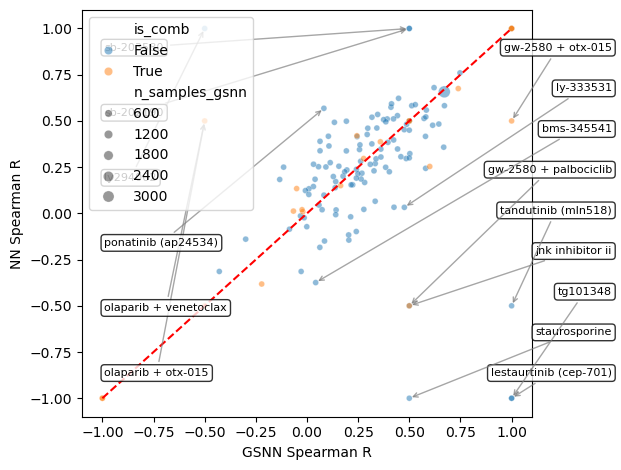

In [7]:
plt.figure() 
sbn.scatterplot(data=res, x='spearman_r_gsnn', y='spearman_r_nn', alpha=0.5, hue='is_comb', size='n_samples_gsnn')
plt.plot([-1, 1], [-1, 1], 'r--')
plt.xlabel('GSNN Spearman R')
plt.ylabel('NN Spearman R')

# label outliers (difference > 0.4)
outliers = res[abs(res['spearman_r_gsnn'] - res['spearman_r_nn']) > 0.4]

# Get plot limits for positioning
xlim = plt.xlim()
ylim = plt.ylim()

# Split outliers based on which side of diagonal they're on
# Left side: GSNN performs better (upper left triangle)
left_outliers = outliers[outliers['spearman_r_gsnn'] < outliers['spearman_r_nn']].sort_values('spearman_r_nn')
# Right side: NN performs better (lower right triangle)  
right_outliers = outliers[outliers['spearman_r_gsnn'] > outliers['spearman_r_nn']].sort_values('spearman_r_nn')

# Position labels on the left side
left_x = xlim[0] + (xlim[1] - xlim[0]) * 0.05  # 5% from left edge
for i, (idx, row) in enumerate(left_outliers.iterrows()):
    label_y = ylim[0] + (ylim[1] - ylim[0]) * (0.1 + 0.8 * i / max(1, len(left_outliers)-1))
    plt.annotate(f'{row["drug_combination"]}', 
                xy=(row['spearman_r_gsnn'], row['spearman_r_nn']),
                xytext=(left_x, label_y),
                arrowprops=dict(arrowstyle='->', color='gray', alpha=0.7),
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8),
                fontsize=8)

# Position labels on the right side  
right_x = xlim[1] - (xlim[1] - xlim[0]) * 0.05 + 0.5 # 5% from right edge
for i, (idx, row) in enumerate(right_outliers.iterrows()):
    label_y = ylim[0] + (ylim[1] - ylim[0]) * (0.1 + 0.8 * i / max(1, len(right_outliers)-1))
    plt.annotate(f'{row["drug_combination"]}', 
                xy=(row['spearman_r_gsnn'], row['spearman_r_nn']),
                xytext=(right_x, label_y),
                arrowprops=dict(arrowstyle='->', color='gray', alpha=0.7),
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8),
                fontsize=8,
                ha='right')
plt.tight_layout() 
plt.show() 

In [4]:
res[lambda x: x.drug_combination == 'lestaurtinib (cep-701)']

,drug_combination,n_samples_gsnn,r2_gsnn,pearson_r_gsnn,mse_gsnn,spearman_r_gsnn,n_samples_nn,r2_nn,pearson_r_nn,mse_nn,spearman_r_nn,is_comb
47,lestaurtinib (cep-701),3,-0.297364,0.884313,0.690259,1.0,3,-0.245107,-0.998532,0.662456,-1.0,False


In [16]:
res[lambda x: x.n_samples_gsnn > 25].sort_values('r2_gsnn', ascending=False).head(25)

,drug_combination,n_samples_gsnn,r2_gsnn,pearson_r_gsnn,mse_gsnn,spearman_r_gsnn,n_samples_nn,r2_nn,pearson_r_nn,mse_nn,spearman_r_nn,is_comb
91,trametinib (gsk1120212),36,0.462925,0.722403,0.410598,0.747748,36,0.515273,0.720549,0.370577,0.759846,False
152,overall,3503,0.462406,0.697094,0.420372,0.671245,3503,0.424985,0.681659,0.449633,0.657322,False
109,venetoclax,29,0.364563,0.661236,0.359454,0.580788,29,0.155728,0.549390,0.477587,0.521675,False
20,dasatinib,38,0.360007,0.602849,0.494032,0.620965,38,0.316209,0.640059,0.527841,0.680053,False
55,motesanib (amg-706),34,0.332553,0.603037,0.331955,0.502675,34,-0.020404,0.448115,0.507498,0.322941,False
81,selumetinib (azd6244),34,0.331402,0.590397,0.673165,0.671709,34,0.271666,0.546445,0.733308,0.582321,False
7,axitinib (ag-013736),36,0.325188,0.606528,0.276559,0.571943,36,0.099584,0.513129,0.369019,0.513514,False
23,erlotinib,36,0.306903,0.579177,0.226579,0.425225,36,0.030008,0.326906,0.317099,0.033205,False
88,tivozanib (av-951),33,0.278939,0.531753,0.499011,0.614189,33,0.047416,0.433594,0.659237,0.476644,False
25,foretinib (xl880),32,0.268946,0.532996,0.569025,0.583211,32,0.172240,0.470252,0.644298,0.558651,False


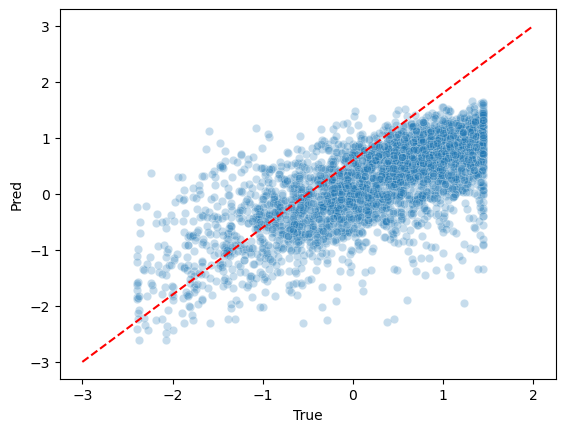

In [50]:
gsnn_preds = pd.read_csv('../workflow/exp/default/gsnn/predictions.csv') 
nn_preds = pd.read_csv('../workflow/exp/default/nn/predictions.csv') 

plt.figure() 
sbn.scatterplot(data=gsnn_preds, x='y_true', y='y_pred', alpha=0.25)
plt.plot([-3, 2], [-3, 3], 'r--')
plt.xlabel('True')
plt.ylabel('Pred')
plt.show() 

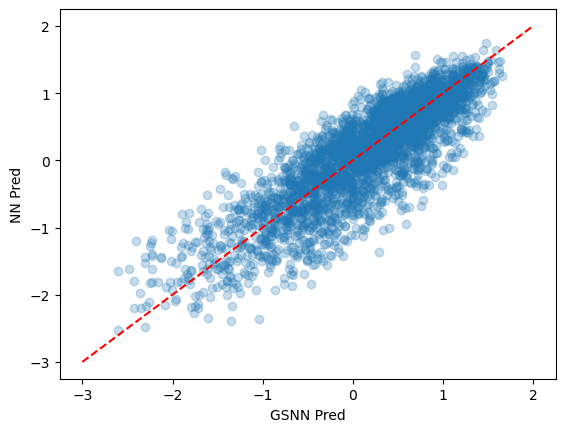

In [51]:
plt.figure() 
plt.plot(gsnn_preds.y_pred, nn_preds.y_pred, 'o', alpha=0.25)
plt.plot([-3, 2], [-3, 2], 'r--')
plt.xlabel('GSNN Pred')
plt.ylabel('NN Pred')
plt.show() 

In [53]:
pred_mean = (gsnn_preds.y_pred + nn_preds.y_pred) / 2 

r_nn = np.corrcoef(nn_preds.y_pred, nn_preds.y_true)[0, 1]
r_gsnn = np.corrcoef(gsnn_preds.y_pred, gsnn_preds.y_true)[0, 1]
r_mean = np.corrcoef(pred_mean, gsnn_preds.y_true)[0, 1] 

print(f'NN R: {r_nn:.2f}, GSNN R: {r_gsnn:.2f}, Mean R: {r_mean:.2f}')

NN R: 0.68, GSNN R: 0.70, Mean R: 0.72
